Agenda:

1. Pip Install and PyPi, Modules and Packages, name and "main"
2. Lambda Expressions, Map, and Filter Functions
3. Collections: namedtuple(), deque, ChainMap, Counter, OrderedDict, defaultdict, UserDict, UserList, Counter, OrderedDict
4. Pylint Overview
5. Running tests with the Unittest Library
6. SQL Database management
7. Basics of SQL
8. Clause and condition
9. Writing SQL queries
10. Joins
11. Hands On Project – Car Rental System (Database creation andquerying with MySQL)

__Python namespaces and scopes__

A Namespace is a place where a variable is stored. Namespaces are implemented as dictionaries. There are the local, global and built-in namespaces as well as nested namespaces in objects (in methods). A namespace containing all the built-in names is created when we start the Python interpreter and exists as long as the interpreter runs. This is the reason that built-in functions like id(), print() etc. are always available to us from any part of the program. Each module creates its own global namespace.

These different namespaces are isolated. Hence, the same name that may exist in different modules does not collide.

Modules can have various functions and classes. A local namespace is created when a function is called, which has all the names defined in it. Similar is the case with class.

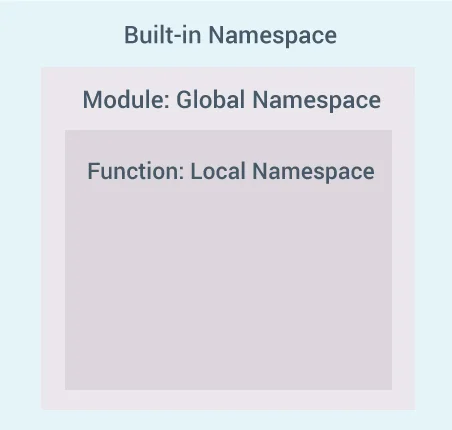

__Scopes__:

Although there are various unique namespaces defined, we may not be able to access all of them from every part of the program. The concept of scope comes into play.

A scope is the portion of a program from where a namespace can be accessed directly without any prefix.

At any given moment, there are at least three nested scopes.

- Scope of the current function which has local names
- Scope of the module which has global names
- Outermost scope which has built-in names

When a reference is made inside a function, the name is searched in the local namespace, then in the global namespace and finally in the built-in namespace.

If there is a function inside another function, a new scope is nested inside the local scope.

The following example explains the concept of scopes and namespaces

AttributeError: 'int' object has no attribute '__name__'

In [3]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope:", spam)

After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope: global spam


In [35]:
def scope_test():
    def do_local():
        spam = "local spam"        
    spam = "test spam"
    do_local()
    return spam

scope_test()
    

'test spam'

__Python Modules__

A module is a file containing Python definitions and statements. The file name is the module name with the suffix .py appended. Within a module, the module’s name (as a string) is available as the value of the global variable `__name__`. For instance, use your favorite text editor(such as VSCode) to create a file called "fibo.py" in the current directory with the following contents

In [1]:
# Fibonacci numbers module

def fib(n):    # write Fibonacci series up to n
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()

def fib2(n):   # return Fibonacci series up to n
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result

Now launch the Python interpreter and import this module with the following command:

In [ ]:
import fibo

This does not add the names of the functions defined in fibo directly to the current namespace, it only adds the module name `fibo` there. Using the module name you can access the functions. For eg. for n = 10, `fibo.fib(100)` and `fibo.fib2(100)`. You can check the module name with `fibo.__name__`.

It is also possible specify an alias using `as` while importing a module. One can also import specific functions from the module instead of the whole module.

In [ ]:
import fibo as fib #import as alias fib
from fibo import fib as fibonacci #import function fib as alias fibonacci

__Executing modules as scripts__

When you run a Python module with `python fibo.py <arguments>` in the command line, the code in the module will be executed, just as if you imported it, but with the `__name__` set to `"__main__"`. That means that by adding the below code at the end of your module you can make the file usable as a script as well as an importable module, because the code that parses the command line only runs if the module is executed as the “main” file.

`__main__` is the name of the environment where top-level code is run. “Top-level code” is the first user-specified Python module that starts running. It’s “top-level” because it imports all other modules that the program needs. Sometimes “top-level code” is called an entry point to the application.

In [ ]:
if __name__ == "__main__":
    import sys
    fib(int(sys.argv[1]))

In other words, when the interpreter runs a module, the `__name__` variable will be set as  `__main__` if the module that is being run is the main program.

But if the code is importing the module from another module, then the `__name__`  variable will be set to that module’s name.

More details here: https://docs.python.org/3/library/__main__.html#:~:text=In%20Python%2C%20the%20special%20name,py%20file%20in%20Python%20packages.

__Lambda expressions__

Lambda expressions are small anonymous functions.

Syntax:

__lambda__ _arguments: expression_

In [8]:
def func(a, b):
    return a * b

func(4,5)

20

In [9]:
x = lambda a, b : a * b
print(x(4,5))

20


The above expression is the same as writing the below code. The only difference is that lambda expressions are more succint and we dont need to write a complete function and provide a name to the function

In [16]:
def func(a,b):
    return a*b

x = func(5,6)
x

30

In [5]:
x = lambda a : a + 10
print(x(5))

15


In [6]:
x = lambda a, b, c : a + b + c
print(x(5, 6, 2))

13


In [19]:
#Get a list of numbers that a divisible by any valid number passed to the lambda expression as argument
x = lambda z: [y for y in range(1,100) if y % z ==0]
x(20)

[20, 40, 60, 80]

In [13]:
max((5,7))

7

In [15]:
#Get the maximum of two numbers

x = lambda a,b: min(a,b)
x(3,2)

2

In [24]:
list1 = [lambda arg=x: arg * 10 for x in range(1, 5)]
# list1
for item in list1:
    print(item())

10
20
30
40


In [27]:
# Python 3 code to print people above 18 yrs
ages = [13, 90, 17, 59, 21, 60, 5]
 
adults = list(filter(lambda age: age > 18, ages))
 
print(adults)

[90, 59, 21, 60]


We can also use lambda expressions in other functions

In [27]:
def myfunc(n):
    return lambda a : a * n

mylambdafunc = myfunc(4)

print(mylambdafunc(12))

48


The filter() method filters the given sequence with the help of a function that tests each element in the sequence to be true or not.

Syntax:

__filter__(function, sequence)

In [41]:
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

# def even(num):
#     if num % 2 == 0:
#         return True
#     else:
#         return False
    
x = filter(lambda num:num>5, my_list)
list(x)

[6, 8, 11, 12]

In [37]:
# function that filters vowels
def fun(variable):
    letters = ['a', 'e', 'i', 'o', 'u']
    if (variable in letters):
        return True
    else:
        return False
    
sequence = ['g', 'e', 'e', 'j', 'k', 's', 'p', 'r']
  
# using filter function
filtered = filter(fun, sequence)
  
print('The filtered letters are:')
set(filtered)

The filtered letters are:


{'e'}

In [34]:
2 in [1,2,3]

True

filter() is normally used with lambda expressions

In [45]:
# Program to filter out only the even items from a list
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(filter(lambda x: (x%2 == 0) , my_list))
new_list

[4, 6, 8, 12]

__map()__ function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

Syntax:

__map__(function, iterable, /, *iterables)

In [29]:
# Python program to demonstrate working
# of map.
  
# Return double of n
def addition(n):
    return n + n
  
# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

[2, 4, 6, 8]


In [30]:
# Program to double each item in a list using map()

my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(map(lambda x: x * 3 , my_list))

print(new_list)

[2, 10, 8, 12, 16, 22, 6, 24]


In [42]:
# Add two lists using map and lambda
  
numbers1 = [1, 2, 3]
numbers2 = [4, 5, 6]
  
result = map(lambda x, y: x * y * 3, numbers1, numbers2)
print(list(result))

[12, 30, 54]


__Databases and SQL__

A database is a software that stores data. The data can be structured(like tabular data with rows and columns) or unstructured(like JSON). There are two types of databases: relational and non-relational. Relational databases are used to store structured data and non-relational databases are used to store unstructured data.

Examples of structured data:

| ID | Name | Age | Company |
| --- | ----------- |---|---------|
| 1 | John | 27 | ABC |
| 2 | Sam | 34 | XYZ |
| 3 | Vicki | 30 | DXF |

Examples of unstructured data:

- Media and entertainment data, surveillance data, geo-spatial data, audio, weather data
- Document collections, Invoices, records, emails, productivity applications
- Internet of Things (IoT). Sensor data, ticker data


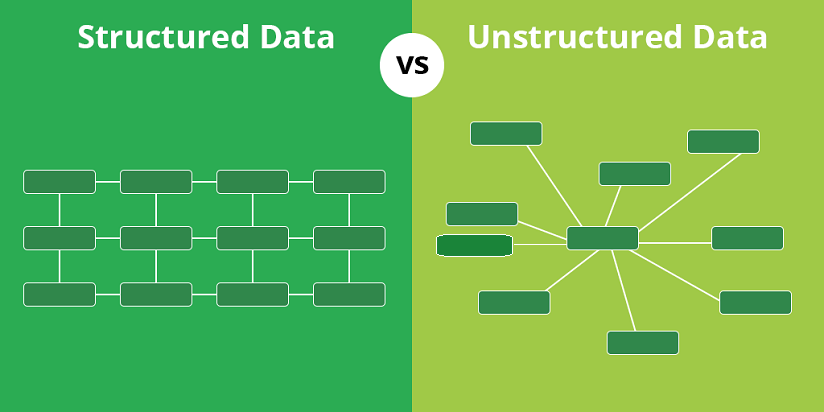

```{
   "TransId"         :   3,
   "TransDate"       :   "01-JAN-2015",
   "TransTime"       :   "10:05:00",
   "TransType"       :   "Deposit",
   "AccountNumber"   :   125,
   "AccountName"     :   "Smith, Jane",
   "TransAmount"     :   300.00,
   "Location"        :   "website",
   "CashierId"       :   null,
   "ATMDetails"      :   null,
   "WebDetails"      : {
                     "URL"   : "www.proligence.com/acme/dep.htm"
              },
   "Source"   :   "Transfer",
   "TransferDetails"   :
            {
               "FromBankRouting"   : "012345678",
               "FromAccountNo"   : "1234567890",
               "FromAccountType"   : "Checking"
            }
}```

To interact with a relational database software, the SQL language is used. SQL stands for Structured Query Language. It is a programming language to query __R__elational __D__atabase __M__anagement __S__ystems (RDBMS). 
Popular RDBMS software are PostgreSQL, Oracle MySQL, IBM DB2, Maria DB.

An SQL database contains one or more tables. Before creating a database with tables, we need to design it first. Designing the database is done using an Entity-Relationship(ER) model. 

__ER model__

ER model stands for an Entity-Relationship model. It is a high-level data model. This model is used to define the data elements and relationship for a specified system.

It develops a conceptual design for the database. It also develops a very simple and easy to design view of data.
In ER modeling, the database structure is portrayed as a diagram called an entity-relationship diagram.

For example, suppose we design a school database. In this database, the student will be an entity with attributes like address, name, id, age, etc. The address can be another entity with attributes like city, street name, pin code, etc and there will be a relationship between them.


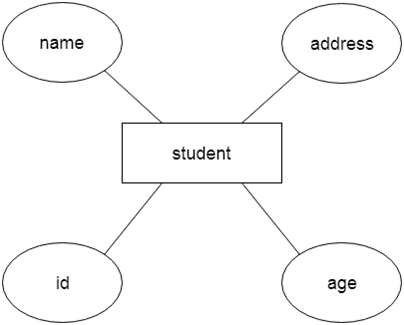

To read more about ER Modelling: https://www.visual-paradigm.com/guide/data-modeling/what-is-entity-relationship-diagram/

The below is an example of another ER model with multiple, entities, and their relationships:

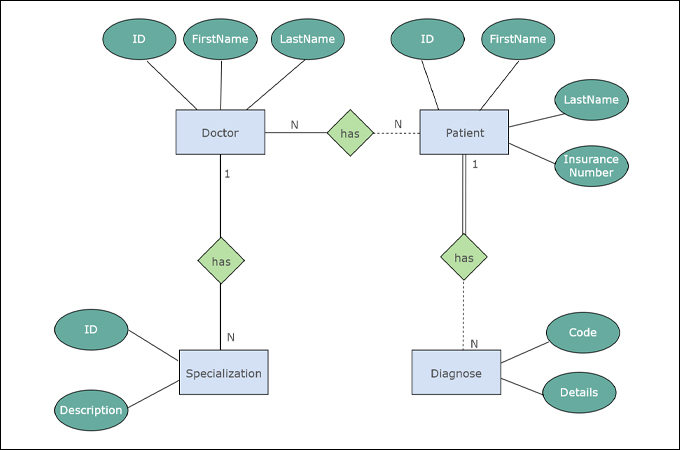

For this lesson, we will use PostgreSQL DB. We will first install PostgreSQL server and load a sample database with pre-defined tables. Then, we will query the database to practice common operations. The ER model for the sample database is below:

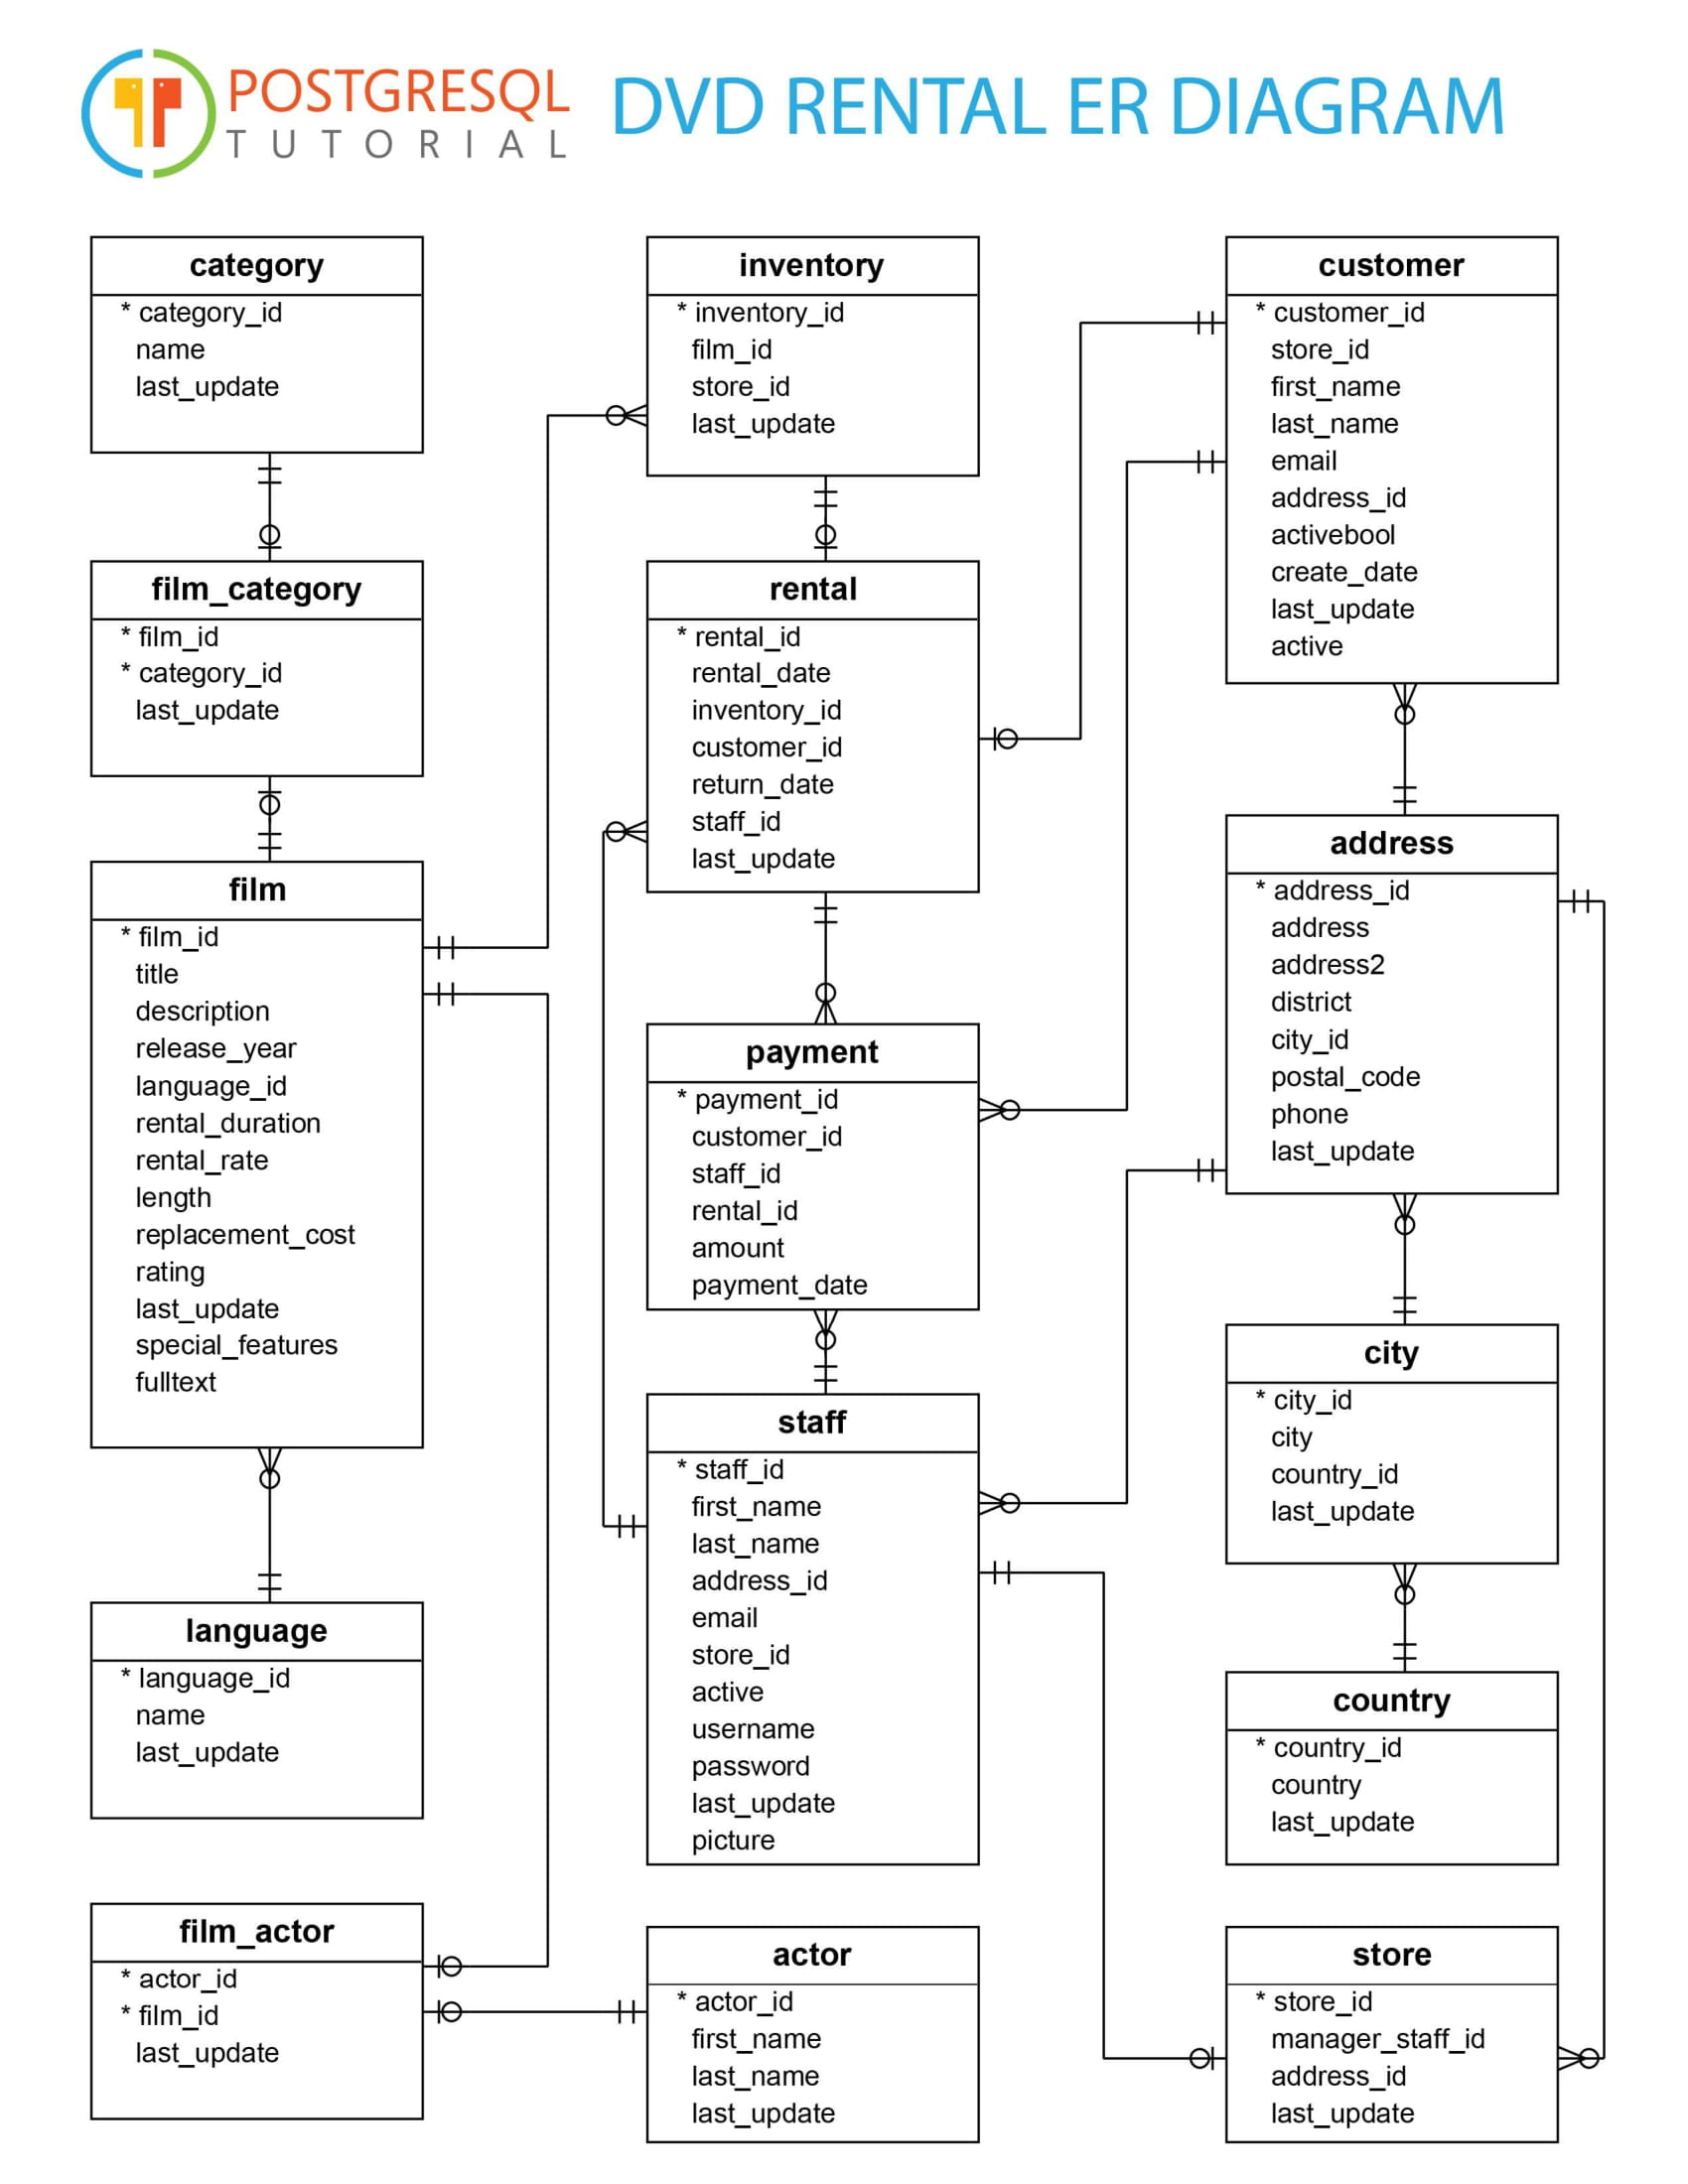

ERD symbols: The ERD symbols below provide a reference for creating ERD diagrams

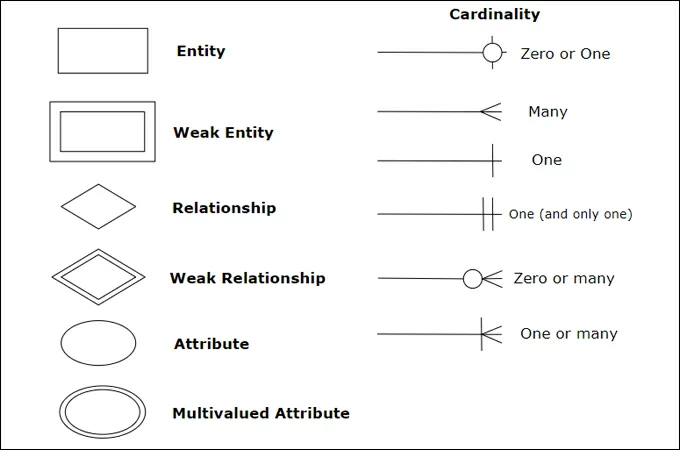

In [ ]:
# To get all tables in a database:
SELECT * from information_schema.tables;

__SELECT clause__ 

Syntax:

```SELECT
   select_list
FROM
   table_name;```

1) Using PostgreSQL SELECT statement to query data from one column example:

`SELECT first_name FROM customer;`

2) Using PostgreSQL SELECT statement to query data from multiple columns example:

```SELECT
   first_name,
   last_name,
   email
FROM
   customer;```
   
3) Using PostgreSQL SELECT statement to query data from all columns of a table example:

`SELECT * FROM customer;`

4) Using PostgreSQL SELECT statement with expressions example. In this example, we used the concatenation operator || to concatenate the first name, space, and last name of every customer.

```SELECT 
   first_name || ' ' || last_name,
   email
FROM 
   customer;```
   
5) Using PostgreSQL SELECT statement with expressions example:

`SELECT 5 * 3;`

__PostgreSQL ORDER BY clause__

Syntax:

```SELECT
	select_list
FROM
	table_name
ORDER BY
	sort_expression1 [ASC | DESC],
        ...
	sort_expressionN [ASC | DESC];```

1) Using PostgreSQL ORDER BY clause to sort rows by one column:

```SELECT
	first_name,
	last_name
FROM
	customer
ORDER BY
	first_name ASC;```
    
The default order is ascending
    
2) Using PostgreSQL ORDER BY clause to sort rows by one column in descending order:

```SELECT
       first_name,
       last_name
FROM
       customer
ORDER BY
       last_name DESC;```
       
3) Using PostgreSQL ORDER BY clause to sort rows by multiple columns:

```SELECT
	first_name,
	last_name
FROM
	customer
ORDER BY
	first_name ASC,
	last_name DESC;```
    
4) Using PostgreSQL ORDER BY clause to sort rows by expressions:

```SELECT 
	first_name,
	LENGTH(first_name) AS len
FROM
	customer
ORDER BY 
	len DESC;```

__PostgreSQL SELECT DISTINCT clause__:

The DISTINCT clause is used in the SELECT statement to remove duplicate rows from a result set.

Syntax:

```SELECT DISTINCT column1 FROM table_name;```
   

In this statement, the values in the column1 column are used to evaluate the duplicate.

If you specify multiple columns, the DISTINCT clause will evaluate the duplicate based on the combination of values of these columns.

```SELECT DISTINCT column1, column2 FROM table_name;```
   


__Data types__:

The following data types are supported by PostgreSQL:

- Boolean
- Character Types [ such as char, varchar, and text]
- Numeric Types [ such as integer and floating-point number]
- Temporal Types [ such as date, time, timestamp, and interval]
- UUID [ for storing UUID (Universally Unique Identifiers) ]
- Array [ for storing array strings, numbers, etc.]
- JSON [ stores JSON data]
- hstore [ stores key-value pair]

Special Types [ such as network address and geometric data]

__PostgreSQL CREATE TABLE syntax__:

```CREATE TABLE [IF NOT EXISTS] table_name (
   column1 datatype(length) column_contraint,
   column2 datatype(length) column_contraint,
   column3 datatype(length) column_contraint,
   table_constraints
);```

Lets understand constraints first.

__Constraints__:

PostgreSQL includes the following column constraints:

- NOT NULL – ensures that values in a column cannot be NULL.
- UNIQUE – ensures the values in a column unique across the rows within the same table.
- PRIMARY KEY – a primary key column uniquely identify rows in a table. A table can have one and only one primary key. The primary key constraint allows you to define the primary key of a table.
- CHECK – a CHECK constraint ensures the data must satisfy a boolean expression.
- FOREIGN KEY – ensures values in a column or a group of columns from a table exists in a column or group of columns in another table. Unlike the primary key, a table can have many foreign keys.

__Connecting to PostgreSQL DB using Python__

First install the library psycopg2 using the below

`pip install psycopg2`

In [1]:
!pip install psycopg2

Next, create the database in PostreSQL. We will create the Car Rental DB from pgadmin or psql.

`CREATE DATABASE car_rental_db;`

After this follow the project "CAR_RENTAL_PROJ"

In [24]:
import psycopg2

con = psycopg2.connect(database='car_rental_db', user='postgres',
                    password='root')
cur = None

with con:
    
    cur = con.cursor()     

#     print(cur.mogrify("SELECT * from actor;"))

    cur.execute("SELECT table_name from information_schema.tables;")
    rows = cur.fetchall()
    cols = [row[0] for row in rows]
    all(item in cols for item in ("addresses", "users", "admins", "cars", "car_rates", "transactions"))
    

False
